<bound method NDFrame.head of field       cemex_close  cemex_diff
date                               
2000-01-03         8.14         NaN
2000-01-04         7.62       -0.52
2000-01-05         7.61       -0.01
2000-01-06         7.50       -0.11
2000-01-07         7.58        0.08
...                 ...         ...
2019-09-20         7.98        0.22
2019-09-23         7.84       -0.14
2019-09-24         7.79       -0.05
2019-09-25         7.78       -0.01
2019-09-26         7.77       -0.01

[4966 rows x 2 columns]>


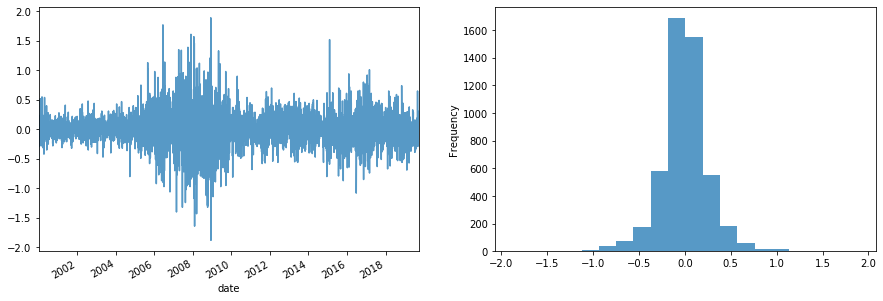

In [9]:
#Ejercicio 1

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

datos = "C:/Users/O61291/Box Sync/Diplomado ML ITAM/data-science-master/files/lec02/ipc0019.csv"
pd_datos = pd.read_csv(datos)

cemex = (pd_datos.query("ticker == 'CEMEXCPO MF Equity' & field == 'PX_LAST'")
                 .set_index("date")
                 .pivot_table(values="value",index = "date",columns=['field']))

dt_index = pd.to_datetime(cemex.index)
cemex.index = dt_index
cemex.rename(columns = {'PX_LAST':'cemex_close'}, inplace = True)

cemex = cemex.assign(cemex_diff = cemex["cemex_close"] - cemex["cemex_close"].shift(periods=1))

print(cemex.head)

fig,(eje1,eje2) = plt.subplots(1,2, figsize=(15,5))
cemex['cemex_diff'].plot(ax=eje1,alpha=(3/4))
cemex['cemex_diff'].plot.hist(ax=eje2,bins=20,alpha=(3/4))


Text(0.5, 1.0, 'Histograma de frecuencias para diferencias diarias')

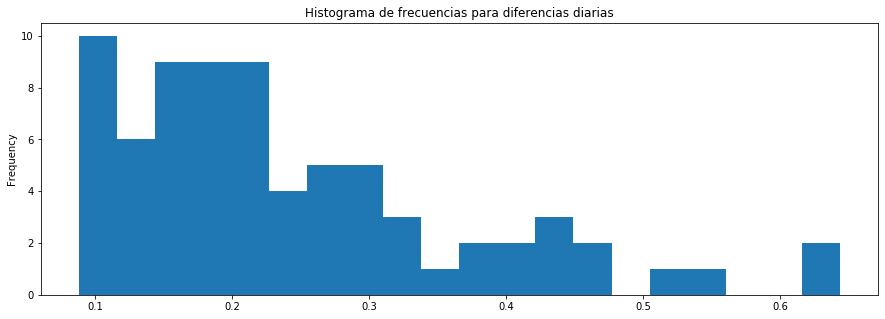

In [10]:
#Ejercicio 2

cemex_sigma = cemex['cemex_diff'][: "2018-06-01"].resample("Q").std()
cemex_sigma.plot.hist(bins=20,figsize=(15,5))
plt.title("Histograma de frecuencias para diferencias diarias trimestral")

Text(0.5, 1.0, 'Histograma de frecuencias para diferencias diarias trimestral')

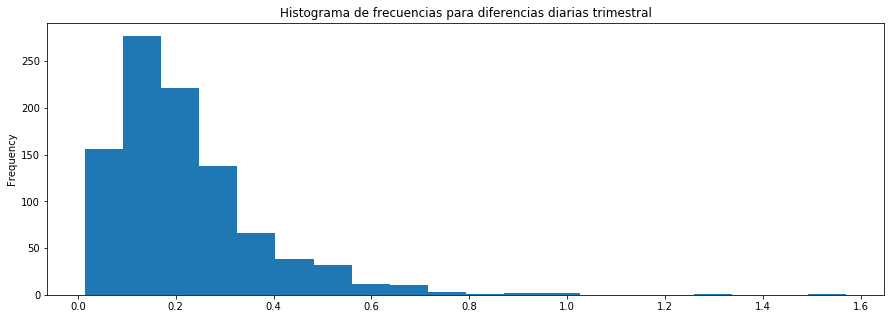

In [11]:
#Ejercicio 2

cemex_sigma = cemex['cemex_diff'][: "2018-06-01"].resample("W").std()
cemex_sigma.plot.hist(bins=20,figsize=(15,5))
plt.title("Histograma de frecuencias para diferencias diarias trimestral")

'''
Al tener una población mayor con las muestras semanales podemos ver una mejor definición de la distribución de frecuencias.
En el segundo histograma los datos están más concentrados que en el primero pero al ser una medida de un horizonte temporal
menor, también existen variaciones más grandes.
'''

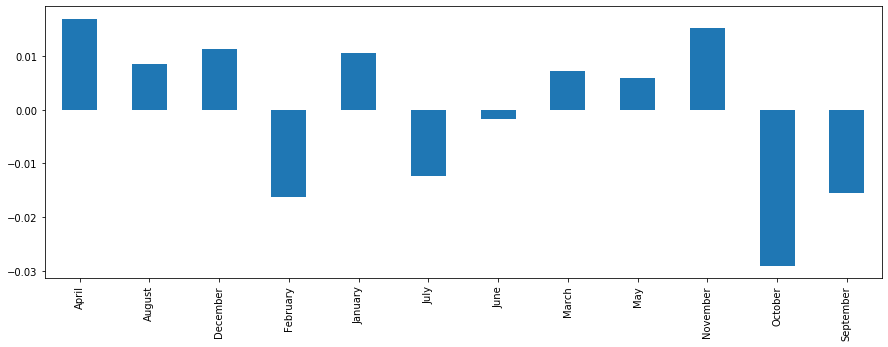

In [14]:
#Ejercicio 4

months = cemex['cemex_diff'].index.strftime("%B")
cemex['cemex_diff'].groupby(months).mean().plot(kind="bar",figsize=(15,5))

'''
El gráfico que se despliega corriendo el código corresponde al retorno esperado (media) por mes de las diferencias diarias
que podría traducirse como ganancias diarias si se conserva la posición
'''

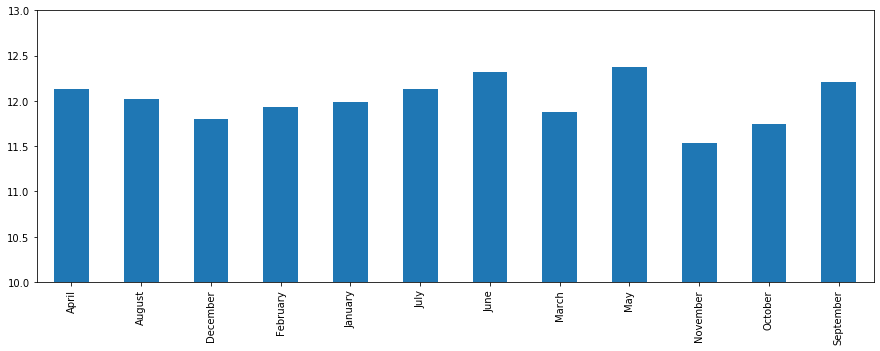

In [19]:
#Ejercicio 5

months = cemex["cemex_close"].index.strftime("%B")
cemex["cemex_close"].groupby(months).mean().plot(kind="bar",figsize=(15,5),ylim=(10,13))

'''
Este gráfico refleja el valor de las acciones al cierre de mes por lo que no refleja ganancias en corto plazo como la figura
anterior. Pero podría usarse para tomar una decisión de compra sabiendo el precio al principio de un mes dado y comparar
ese valor vs lo observado en esta gráfica
'''